## Proyek Analisis Data : Bike Sharing Dataset

- Nama : Dicki Pajri
- Email : dickyfjr@gmail.com
- ID dicoding : dicki_pajri_1I7s

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi total pengguna terdaftar berubah dari bulan ke bulan selama beberapa tahun?
2. Bagaimana distribusi penggunaan sepeda berdasarkan kondisi musim?
3. Bagaimana rata-rata jumlah pengguna sepeda pada hari libur dibandingkan dengan hari kerja?
4. Bagaimana tren penggunaan sepeda setiap jamnya pada masing-masing musim?

## Menyiapkan semua library yang dibutuhkan

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
# import dataset day
day_df=pd.read_csv('/content/drive/MyDrive/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# import dataset hour
hour_df=pd.read_csv('/content/drive/MyDrive/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Setelah melihat kedua dataset tersebut, tidak terdapat perbedaan yang signifikan dari kedua dataset tersebut. Hanya saja pada dataset hour ada kolom hr yang berisi data jam yang merupakan versi lebih detail dari dataset hour. Oleh sebab itu maka akan digunakan dataset hour.

## Assesing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat beberapa kolom dengan tipe data yang tidak sesuai dan akan diubah pada tahap Data Cleaning

In [5]:
# Describe data untuk melihat data statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Mengecek jumlah data null
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat data null pada dataset

In [7]:
#Mengecek data duplikat
hour_df.duplicated().sum()

0

Tidak terdapat duplikasi data

## Cleaning Data

In [8]:
# Mengganti nama kolom
hour_df = hour_df.rename(columns={
    "dteday":"date",
    "yr":"year",
    "hr":"hour",
    "mnth":"month",
    "weathersit":"weather",
    "cnt":"total_count"
})

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
# Merubah tipe data int menjadi category
columns = ["season", "hour", "year", "month", "holiday", "weekday", "workingday", "weather"]
for col in columns:
    hour_df[col] = hour_df[col].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   instant      17379 non-null  int64   
 1   date         17379 non-null  object  
 2   season       17379 non-null  category
 3   year         17379 non-null  category
 4   month        17379 non-null  category
 5   hour         17379 non-null  category
 6   holiday      17379 non-null  category
 7   weekday      17379 non-null  category
 8   workingday   17379 non-null  category
 9   weather      17379 non-null  category
 10  temp         17379 non-null  float64 
 11  atemp        17379 non-null  float64 
 12  hum          17379 non-null  float64 
 13  windspeed    17379 non-null  float64 
 14  casual       17379 non-null  int64   
 15  registered   17379 non-null  int64   
 16  total_count  17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB

Agar memudahkan dalam membaca dataset

In [10]:
# Mengubah kolom season
season_names = {1:"spring", 2:"summer", 3:"fall", 4:'winter'}
hour_df["season"] = hour_df["season"].replace(season_names)

In [11]:
# Mengubah kolom year
years = {0:"2011", 1:"2012"}
hour_df["year"] = hour_df["year"].replace(years)

In [12]:
# mengubah kolom weekday
dateName = {0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"}
hour_df["weekday"] = hour_df["weekday"].replace(dateName)

In [13]:
#mengubah kolom month
monthName = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
hour_df["month"] = hour_df["month"].replace(monthName)

In [14]:
# mengubah kolom weather
weatherName = {1:"clear", 2:"mist", 3:"light snow", 4:"heavy rain"}
hour_df["weather"] = hour_df["weather"].replace(weatherName)

In [15]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,total_count
0,1,2011-01-01,spring,2011,Jan,0,0,Sat,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,Jan,1,0,Sat,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,Jan,2,0,Sat,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,Jan,3,0,Sat,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,Jan,4,0,Sat,0,clear,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis

In [16]:
# Jumlah pengguna sepeda antara casual dan registered
hour_df.agg({
    "casual":"sum",
    "registered":"sum"
})

casual         620017
registered    2672662
dtype: int64

In [17]:
# Jumlah pengguna sepeda per bulan
hour_df.groupby(by=["year", "month"]).total_count.sum().reset_index()

,year,month,total_count
0,2011,Jan,38189
1,2011,Feb,48215
2,2011,Mar,64045
3,2011,Apr,94870
4,2011,May,135821
5,2011,Jun,143512
6,2011,Jul,141341
7,2011,Aug,136691
8,2011,Sep,127418
9,2011,Oct,123511


In [18]:
# Jumlah pengguna sepeda per tahun
hour_df.groupby("year").total_count.sum().reset_index()

,year,total_count
0,2011,1243103
1,2012,2049576


In [19]:
# jumlah pengguna sepeda per musim
hour_df.groupby("season").total_count.sum().reset_index()

,season,total_count
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


In [20]:
# Rata-rata pengguna sepeda berdasarkan weekend atau weekday
hour_df.groupby("workingday").total_count.mean().reset_index()

,workingday,total_count
0,0,181.405332
1,1,193.207754


In [21]:
# Distribusi pengguna berdasarkan je
hour_df.groupby("month").agg({
    "casual":"sum",
    "registered":"sum"
})

,casual,registered
month,,
Jan,12042,122891
Feb,14963,136389
Mar,44444,184476
Apr,60802,208292
May,75285,256401
Jun,73906,272436
Jul,78157,266791
Aug,72039,279155
Sep,70323,275668


# Visualization & Explanatory Analysis

##### 1. Bagaimana distribusi total pengguna terdaftar berubah dari bulan ke bulan selama beberapa tahun?

In [22]:
monthDist = hour_df.groupby(by=["year", "month"]).registered.sum().reset_index()
monthDist

,year,month,registered
0,2011,Jan,35116
1,2011,Feb,41973
2,2011,Mar,51219
3,2011,Apr,72524
4,2011,May,104771
5,2011,Jun,112900
6,2011,Jul,104889
7,2011,Aug,107849
8,2011,Sep,100873
9,2011,Oct,98289


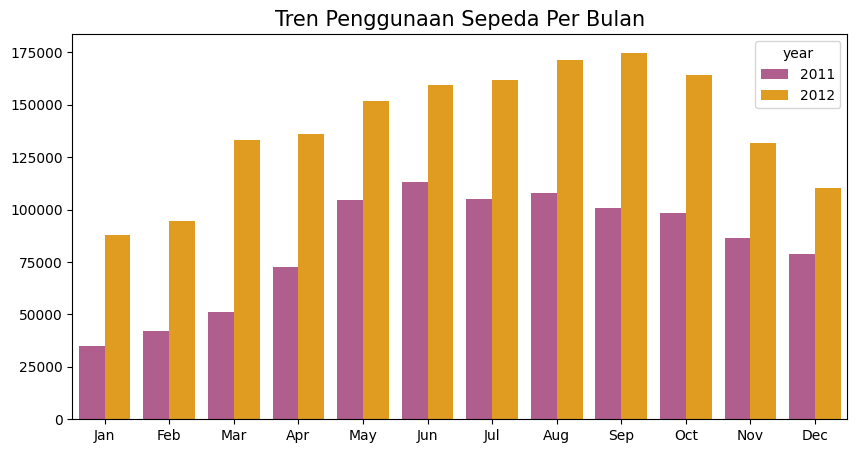

In [23]:
# Bar Plot
plt.figure(figsize=(10,5))

colors = ["#bc5090", "#ffa600"]

sns.barplot(
    x="month",
    y="registered",
    hue="year",
    data=monthDist,
    palette=colors
)

plt.title("Tren Penggunaan Sepeda Per Bulan", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

##### 2. Bagaimana distribusi penggunaan sepeda berdasarkan musim?

In [24]:
seasonDist = hour_df.groupby("season").total_count.sum().reset_index()
seasonDist

,season,total_count
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


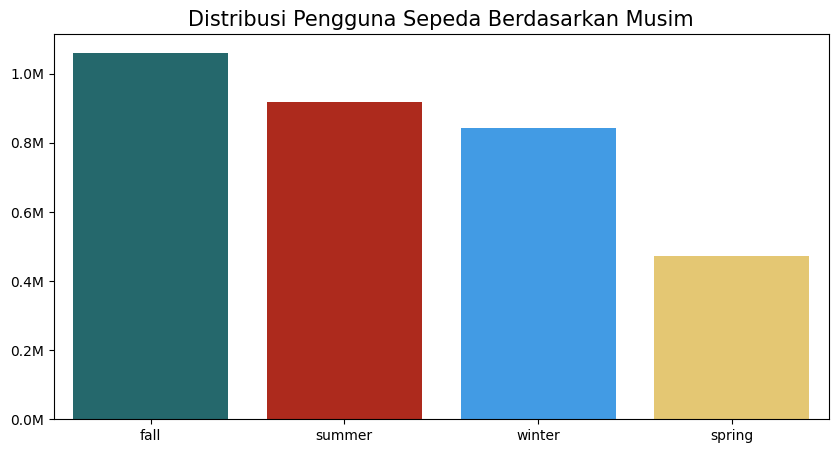

In [25]:
# Bar Plot
from matplotlib.ticker import FuncFormatter

def format_million(value, _):
    return f"{value / 1e6:.1f}M"

plt.figure(figsize=(10,5))

seasonDist_sorted = seasonDist.sort_values(by="total_count", ascending=False)
order = seasonDist_sorted["season"]
colors = ["#197278", "#C51605", "#279EFF", "#F7D060"]

sns.barplot(
    x="season",
    y="total_count",
    data=seasonDist_sorted,
    order=order,
    palette=colors
)

plt.title("Distribusi Pengguna Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
# Atur formatter untuk sumbu x
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_million))
plt.show()

##### 3. Bagaimana rata-rata jumlah pengguna sepeda pada hari libur dibandingkan dengan hari kerja?

In [26]:
mean_df = hour_df.groupby("workingday").total_count.mean().reset_index()
## 0 weekend/holiday 1 weekdays

In [27]:
mean_df['workingday'] = mean_df['workingday'].apply(lambda x: "weekend" if x == 0 else "weekday" )
mean_df.head()

,workingday,total_count
0,weekend,181.405332
1,weekday,193.207754


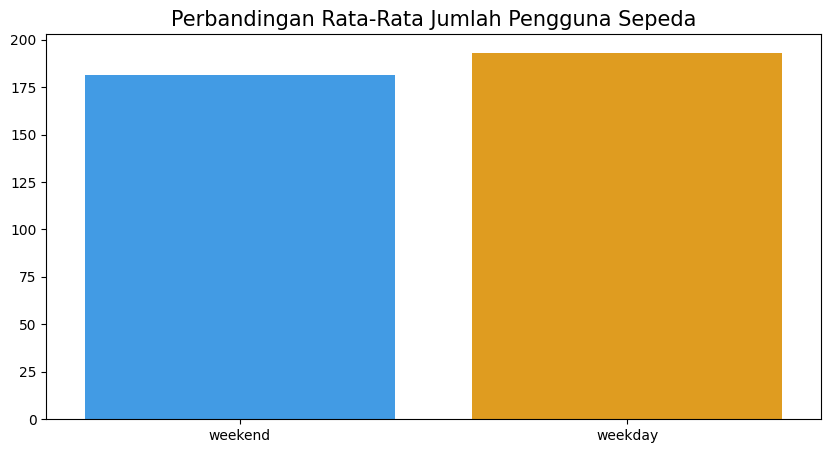

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="workingday",
    y="total_count",
    data=mean_df,
    palette=["#279EFF","#ffa600"]
)

plt.title("Perbandingan Rata-Rata Jumlah Pengguna Sepeda", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

##### 4. Bagaimana tren penggunaan sepeda setiap jamnya pada masing-masing musim?

In [29]:
hourTrend = hour_df.groupby(by=["hour", "season"]).total_count.sum().reset_index()
hourTrend

,hour,season,total_count
0,0,spring,4878
1,0,summer,10459
2,0,fall,13822
3,0,winter,9971
4,1,spring,3229
...,...,...,...
91,22,winter,21871
92,23,spring,7994
93,23,summer,17661
94,23,fall,22986


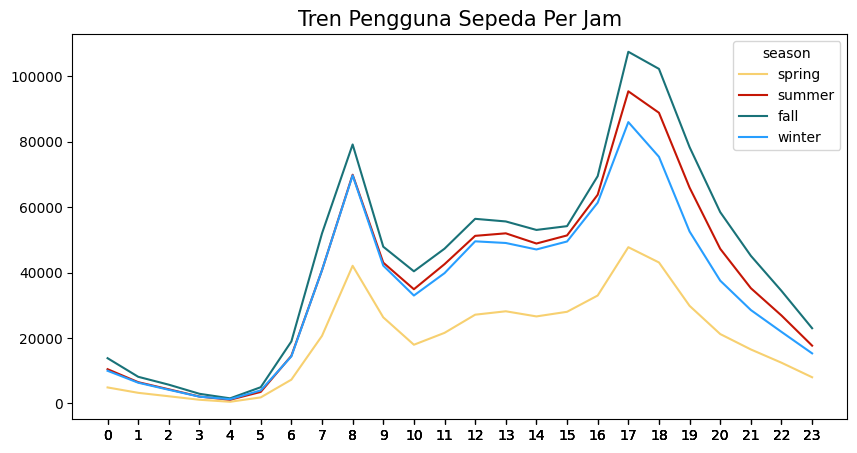

In [30]:
plt.figure(figsize=(10,5))

colors = ["#F7D070", "#C51605", "#197278", "#279EFF"]
sns.lineplot(
    x="hour",
    y="total_count",
    hue="season",
    data=hourTrend,
    palette=colors
)
plt.title("Tren Pengguna Sepeda Per Jam", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(hourTrend['hour'])
plt.show()

In [31]:
hour_df.to_csv("df.csv", index=False)

# Conclusion

- Jumlah pengguna sepeda naik dari tahun 2011 ke 2012. Pada tahun 2011 jumlah pengguna paling banyak yaitu pada bulan juni sedangkan tahun 2012 pada bulan september.
- Jumlah pengguna sepeda paling banyak yaitu pada musim gugur. Yang menarik adalah lebih banyak orang bersepeda di musim dingin dibandingkan musim semi. Perlu analisis lebih lanjut apakah ada hubungannya dengan suhu, cuaca, atau kelembaban.
- Tidak terdapat perbedaan yang signifikan pada rata-rata jumlah pengguna sepeda baik itu weekend maupun weekday
- Pada setiap musim, jumlah pengguna sepeda naik dari jam 6 sampai jam 8. Lalu mulai stabil di jam 9-16, mungkin disebabkan oleh jam kerja dan mencapai puncaknya pada jam 5 sore.